In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import seaborn as sns
sns.set()

pd.set_option("display.precision", 1)
%config InlineBackend.figure_format = 'svg'

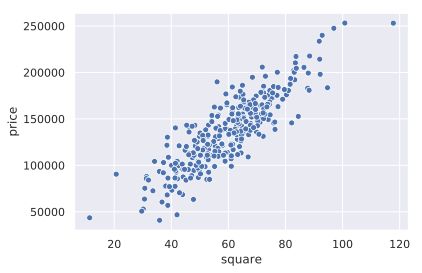

In [55]:
random_seed = 42
num_samples = 300
np.random.seed(random_seed)

square = pd.Series(np.random.normal(40, 15, size=num_samples) + 20)
noise = pd.Series(np.random.normal(0, 20000, num_samples))
price = pd.Series(2290 * square + noise)
df = pd.DataFrame(
    {
        'square': square,
         'price': price,
    })
sns.scatterplot(data=df, x='square', y='price')

In [56]:
house_types = ['Multi-family', 'Townhouse', 'Semi-detached', 'Duplex', 'Detached']
house_type_coefficients = [0.6, 0.7, 0.8, 0.95, 1.1]
house_labels = np.random.randint(5, size=num_samples)

price = price * pd.Series([house_type_coefficients[label] for label in house_labels])

df = pd.DataFrame(
    {
        'square': square,
        'house_type': [house_types[label] for label in house_labels],
        'price': price,
    })

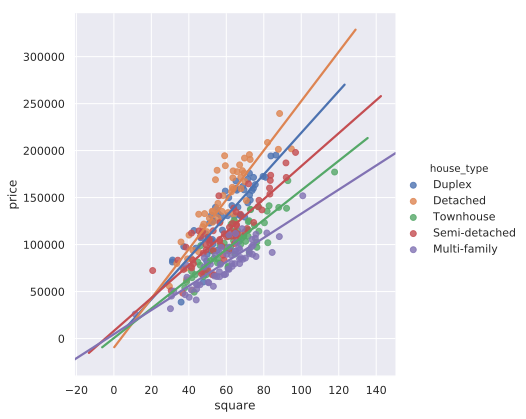

In [57]:
sns.lmplot(x='square', y='price', data=df, hue='house_type', ci=None, height=6)

In [58]:
wall_colors = ['white', 'yellow', 'brown', 'green', 'blue']
wall_color_labels = np.random.randint(5, size=num_samples)
df['wall_color'] = pd.Series([wall_colors[label] for label in wall_color_labels])

In [59]:
df.to_csv('sample_data.csv', index=False, float_format='%.2f')

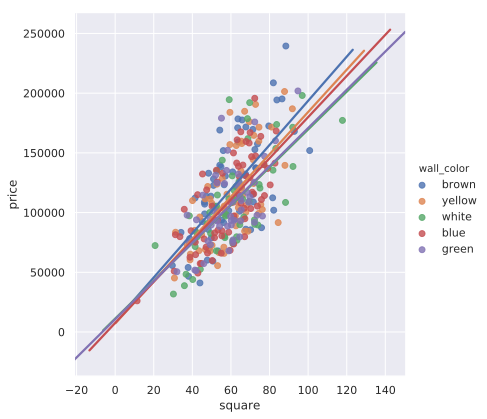

In [60]:
sns.lmplot(x='square', y='price', data=df, hue='wall_color', ci=None, height=6)

Intercept: 27016.919980666527
Coefficients: [  1826.33467357 -11538.05751608    -20.35291473]
Mean Squared Error: 560430768.2934127


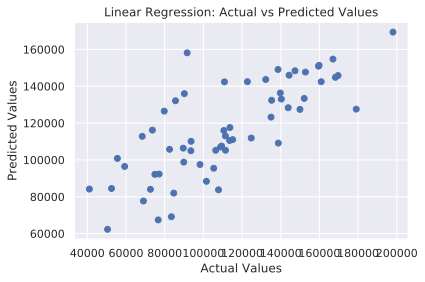

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['house_type_encoded'] = le.fit_transform(df['house_type'])
df['wall_color_encoded'] = le.fit_transform(df['wall_color'])

X = df[['square', 'house_type_encoded', 'wall_color_encoded']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted Values')
plt.show()

In [62]:
df.corr()

,square,price,house_type_encoded,wall_color_encoded
square,1.0e+00,6.6e-01,1.1e-01,5.1e-02
price,6.6e-01,1.0e+00,-3.5e-01,2.4e-03
house_type_encoded,1.1e-01,-3.5e-01,1.0e+00,6.9e-02
wall_color_encoded,5.1e-02,2.4e-03,6.9e-02,1.0e+00
